# Predicting Home Sale Prices

## The Problem

# The Data

## Regression

## Experiment 1

### EDA and Pre-Processing

In [261]:
#%pip install scipy
#%pip install seaborn
#%pip install matplotlib
#%pip install statsmodels

In [262]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy.stats
import statsmodels.api as sma

In [322]:
pd.options.display.max_rows=90

In [264]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### Get first look at data

In [265]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [266]:
train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## There are a few features that are missing a lot of data. I will drop any features that are missing more than 25% of the data

In [267]:
min_count =  int(((100-25)/100)*train.shape[0] + 1)
train_exp1 = train.dropna(axis=1, thresh=min_count)

### Looking at the remaining columns with Null Values

In [268]:
train_exp1.columns[train_exp1.isna().sum()>0]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

### Filling these missing values with Mean for numericals and Mode for Categoricals

### Null Values for 'BsmtQual' 'BsmtCond' 'BsmtExposue' 'BsmtFinType1' 'GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageQual' 'GarageCond' are all meaningful, referencing the absense of these features. Instead of replacing these with the Mode for categoricals, I will replace them with "None"

In [269]:
#Fill in numerical columns
for column in [
    'LotFrontage',
    'MasVnrArea',
    'GarageYrBlt'
]:
    train_exp1.loc[:,(column)] = train_exp1.loc[:,(column)].fillna(train_exp1[column].mean())
    
#Fill in categorical columns
for column in [
    'MasVnrType',
    'Electrical'
]:
    train_exp1.loc[:,(column)] = train_exp1.loc[:,(column)].fillna(train_exp1[column].mode())
    
for column in [
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond'
]:
    train_exp1.loc[:,(column)] = train_exp1.loc[:,(column)].fillna("None")

C:\Users\Tonyj\AppData\Local\Temp\ipykernel_18172\1679257474.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_exp1.loc[:,(column)] = train_exp1.loc[:,(column)].fillna(train_exp1[column].mean())
C:\Users\Tonyj\AppData\Local\Temp\ipykernel_18172\1679257474.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_exp1.loc[:,(column)] = train_exp1.loc[:,(column)].fillna(train_exp1[column].mode())
C:\Users\Tonyj\AppData\Local\Temp\ipykernel_18172\1679257474.py:14: SettingWithCopyWarning: 
A value is t

In [270]:
train_exp1.columns[train_exp1.isnull().sum()>0]

Index(['MasVnrType', 'Electrical'], dtype='object')

### Drop the remaining null values. There is most likely a logical coding error that is preventing the cleaning of these last 9 null values

In [271]:
train_exp1 = train_exp1.dropna()


In [272]:
train_exp1.shape

(1451, 76)

# Looking at distributions of Sale Price Averages, grouped in each category

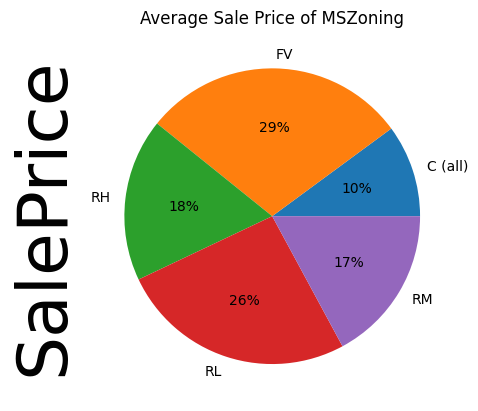

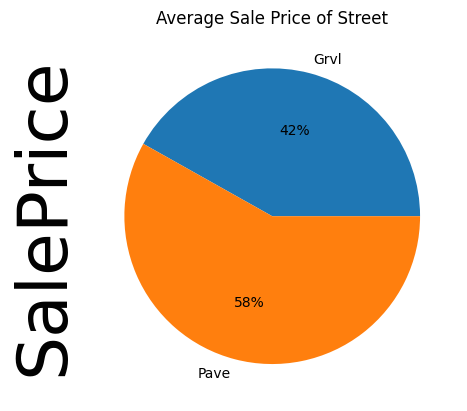

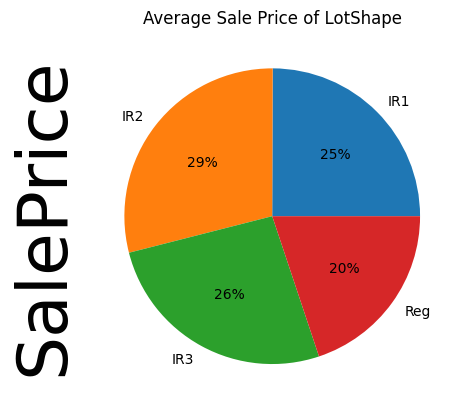

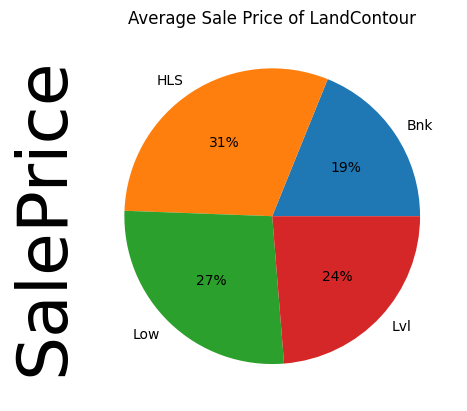

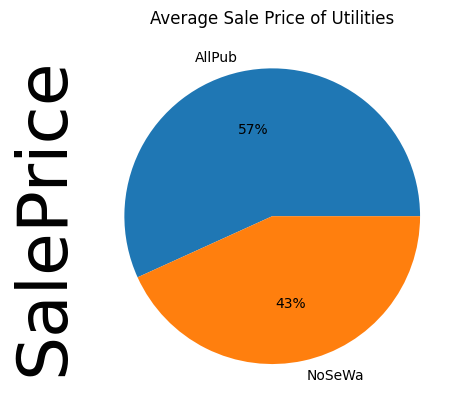

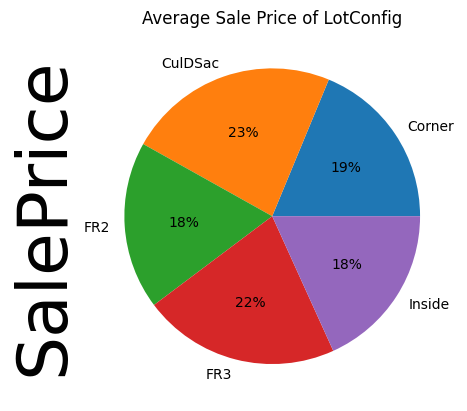

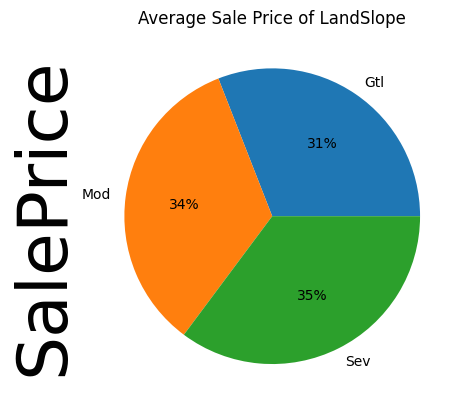

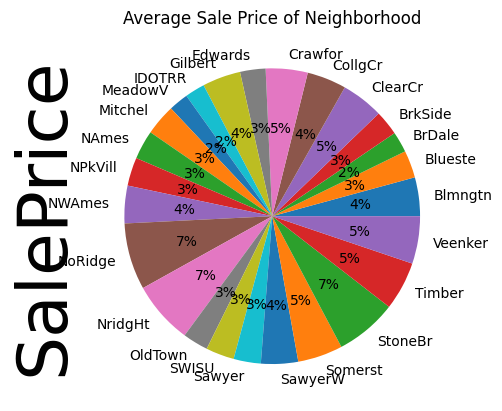

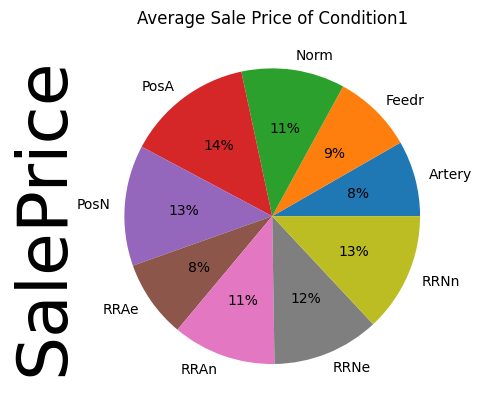

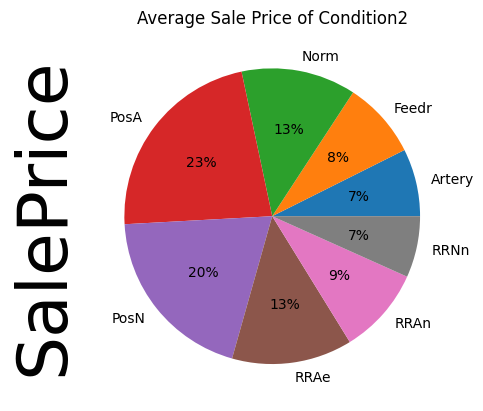

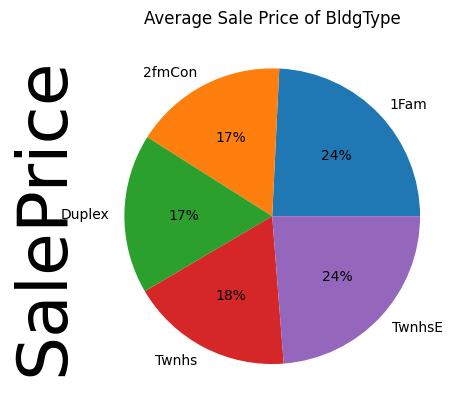

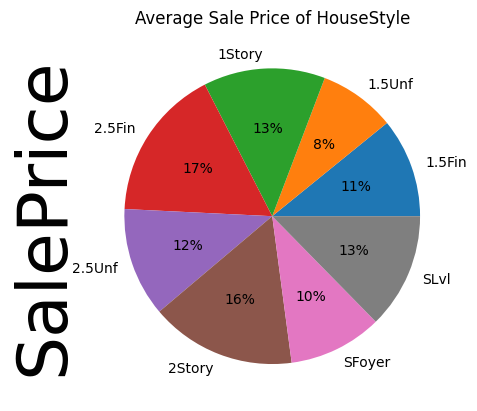

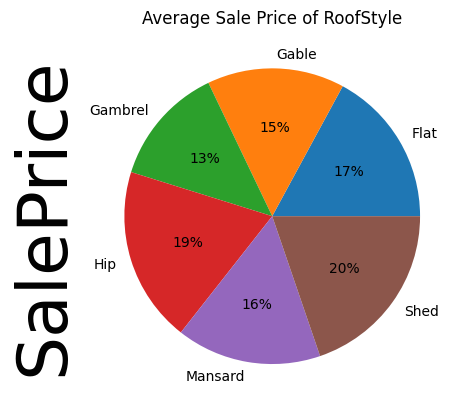

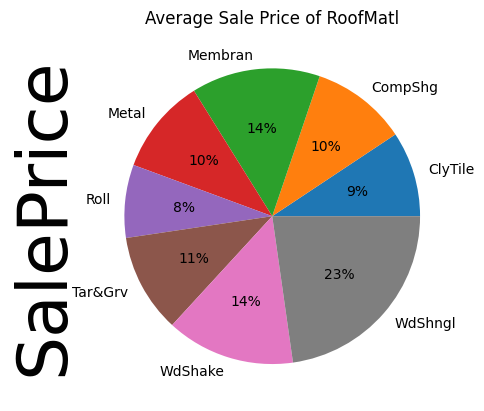

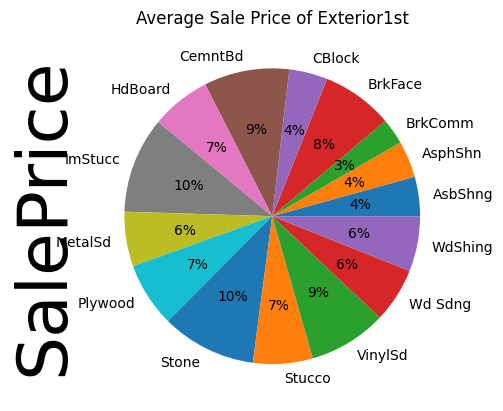

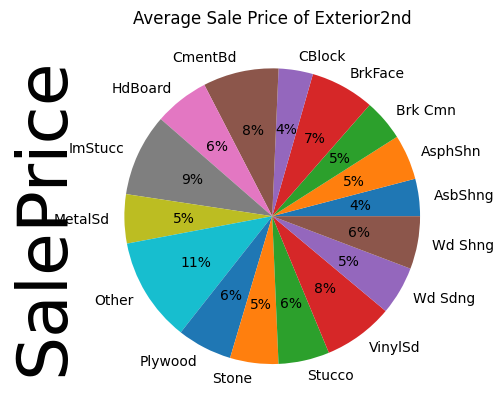

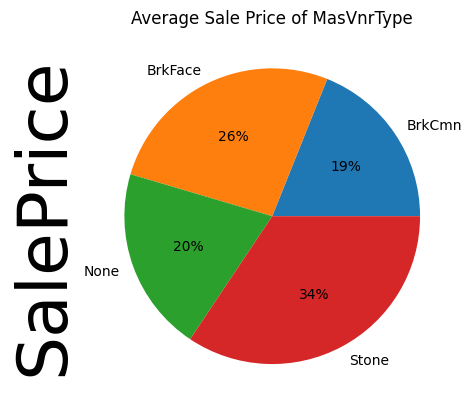

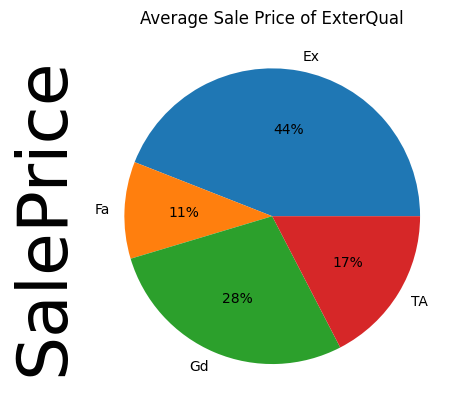

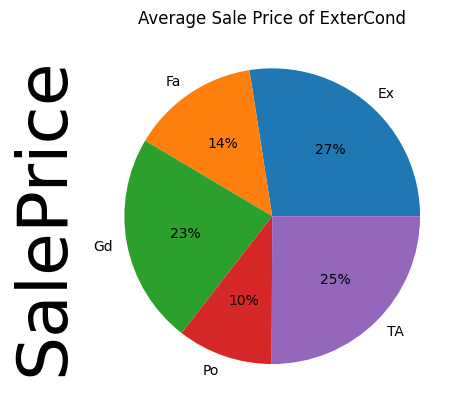

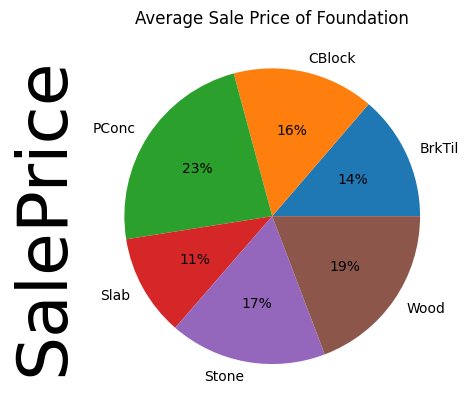

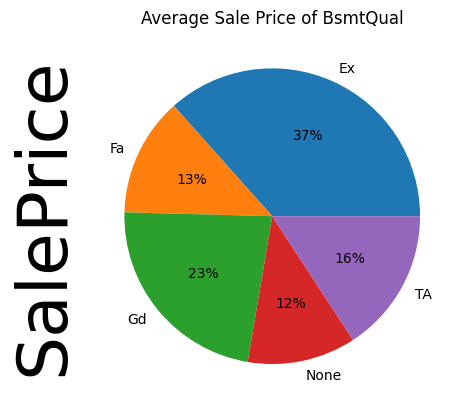

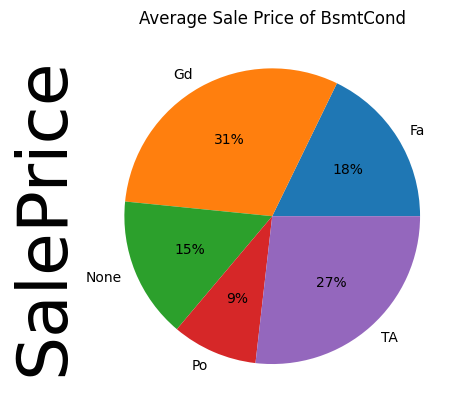

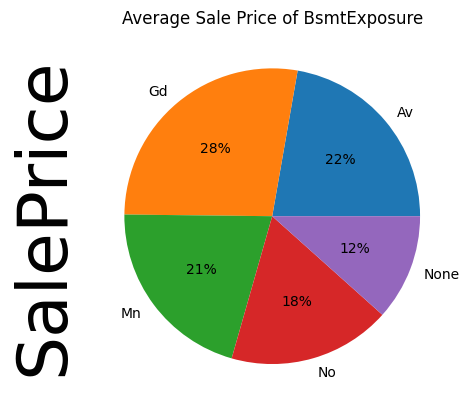

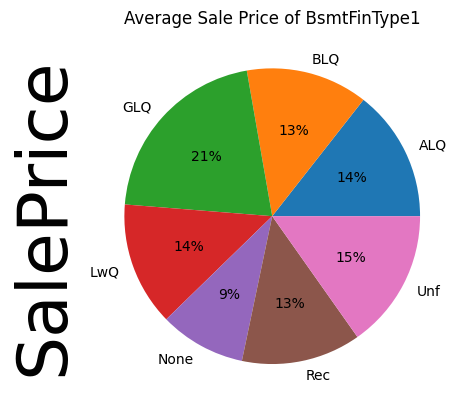

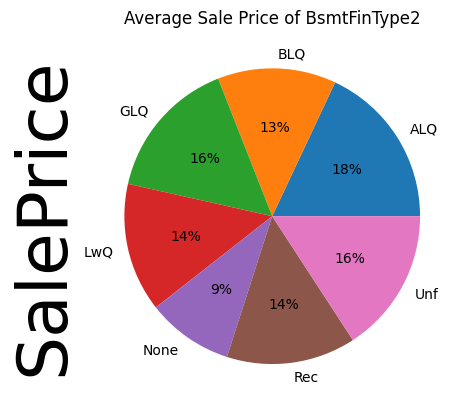

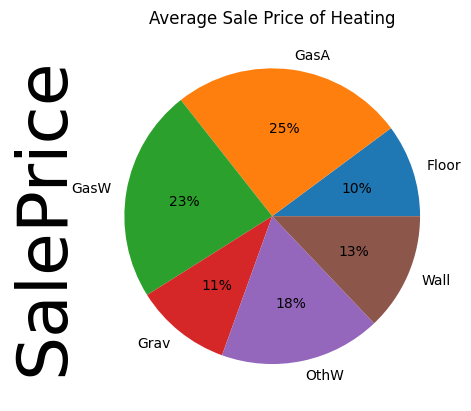

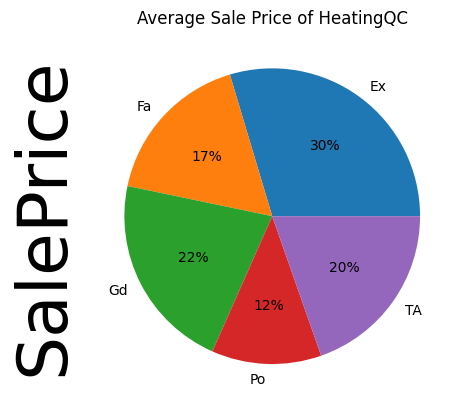

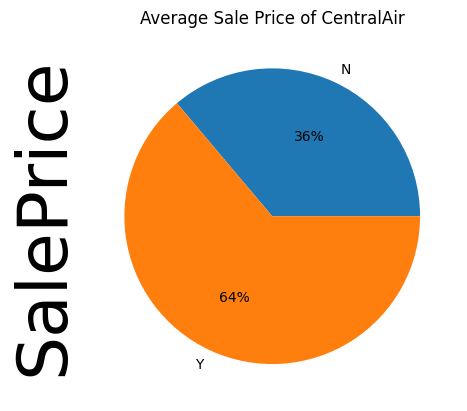

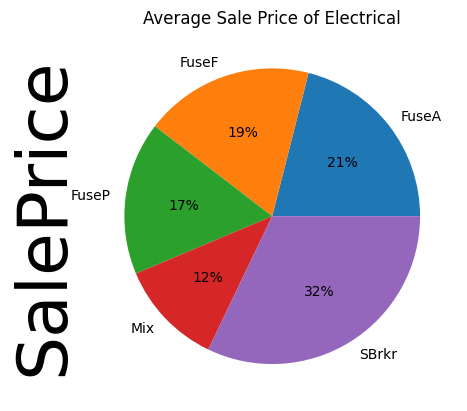

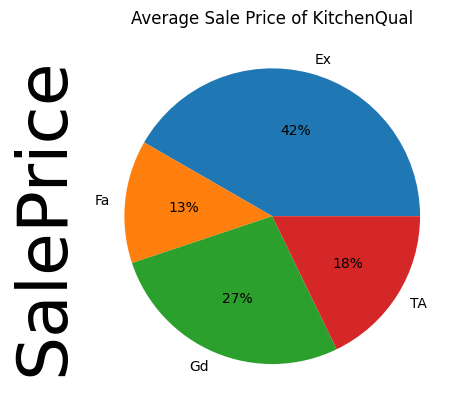

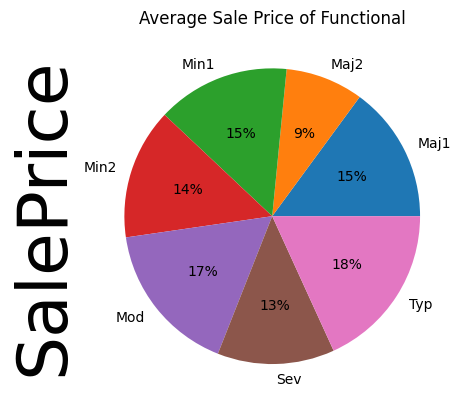

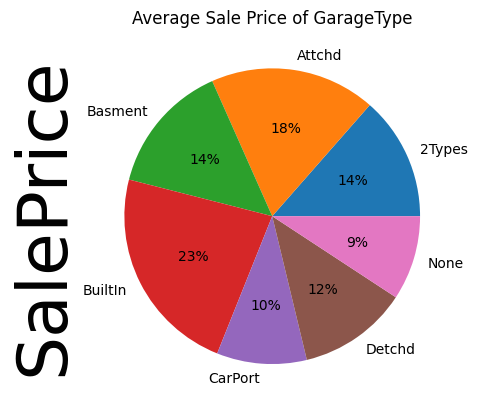

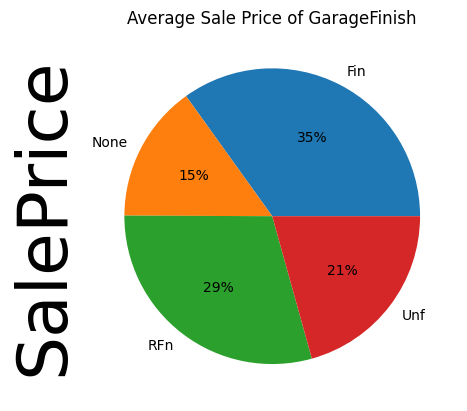

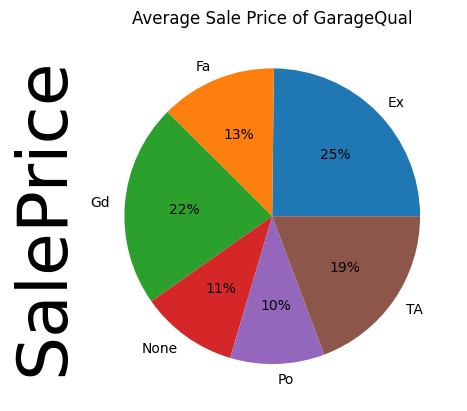

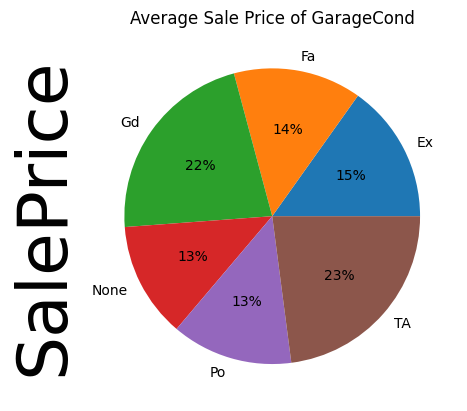

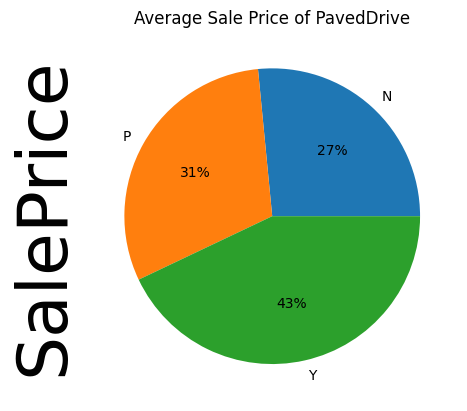

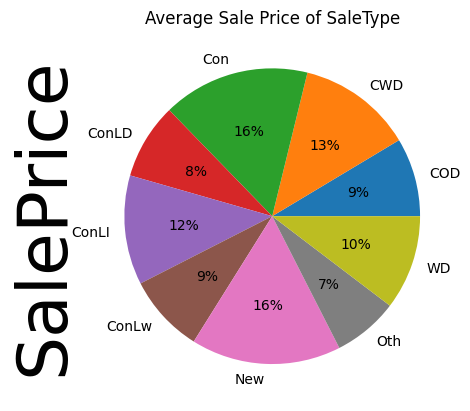

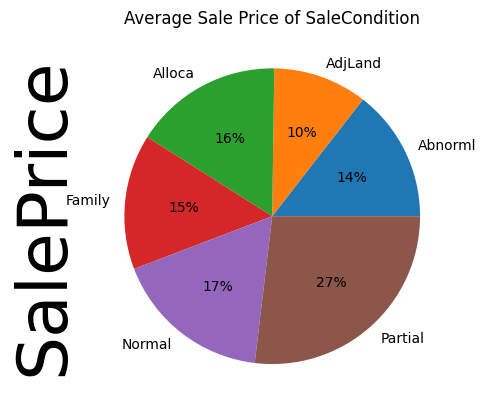

In [273]:
for x in categoricals.columns:
    (train_exp1['SalePrice'].groupby(train_exp1[x]).mean()).plot(kind='pie',autopct='%1.0f%%')
    plt.title("Average Sale Price of " + x)
    plt.show()

## Standardize Data

In [274]:
nums = train_exp1.select_dtypes(exclude='object').drop(['SalePrice'],axis=1)
nums.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [275]:
X = train_exp1[nums.columns]
y = train_exp1['SalePrice']

In [283]:
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [276]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler().fit_transform(X)

#put into a df
X_scaled = pd.DataFrame(scaled,columns = X.columns)

X_scaled

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-1.727674,0.072441,-0.228363,-0.205996,0.656247,-0.520740,1.057250,0.883532,0.509503,0.579345,...,0.352525,-0.752932,0.220747,-0.359363,-0.116704,-0.271106,-0.068905,-0.087961,-1.600006,0.138985
1,-1.725302,-0.872386,0.452424,-0.090876,-0.067870,2.174601,0.162613,-0.424340,-0.573097,1.176868,...,-0.058502,1.623585,-0.702973,-0.359363,-0.116704,-0.271106,-0.068905,-0.087961,-0.488657,-0.613506
2,-1.722930,0.072441,-0.092205,0.074297,0.656247,-0.520740,0.990980,0.835093,0.321705,0.096054,...,0.632770,-0.752932,-0.066969,-0.359363,-0.116704,-0.271106,-0.068905,-0.087961,0.993142,0.138985
3,-1.720558,0.308648,-0.455291,-0.095881,0.656247,-0.520740,-1.858602,-0.714978,-0.573097,-0.497076,...,0.791576,-0.752932,-0.172970,4.093291,-0.116704,-0.271106,-0.068905,-0.087961,-1.600006,-1.365998
4,-1.718186,0.072441,0.633967,0.375612,1.380365,-0.520740,0.957846,0.738213,1.360116,0.467309,...,1.697704,0.778247,0.569034,-0.359363,-0.116704,-0.271106,-0.068905,-0.087961,2.104491,0.138985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,1.723526,0.072441,-0.364520,-0.259352,-0.067870,-0.520740,0.924711,0.738213,-0.573097,-0.971580,...,-0.058502,-0.752932,-0.097255,-0.359363,-0.116704,-0.271106,-0.068905,-0.087961,0.622692,-0.613506
1447,1.725898,-0.872386,0.679353,0.266998,-0.067870,0.377707,0.228883,0.156937,0.084196,0.763874,...,0.128328,2.030304,-0.702973,-0.359363,-0.116704,-0.271106,-0.068905,-0.087961,-1.600006,1.643969
1448,1.728270,0.308648,-0.182977,-0.146734,0.656247,3.073048,-0.997100,1.028852,-0.573097,-0.367466,...,-1.030020,-0.752932,0.205604,-0.359363,-0.116704,-0.271106,-0.068905,4.937397,-0.488657,1.643969
1449,1.730642,-0.872386,-0.092205,-0.079164,-0.791988,0.377707,-0.698888,0.544454,-0.573097,-0.863937,...,-1.086069,2.165877,-0.702973,1.474083,-0.116704,-0.271106,-0.068905,-0.087961,-0.859106,1.643969


## Look at correlations

<AxesSubplot: title={'center': 'Correlations Between Numerical Variables'}>

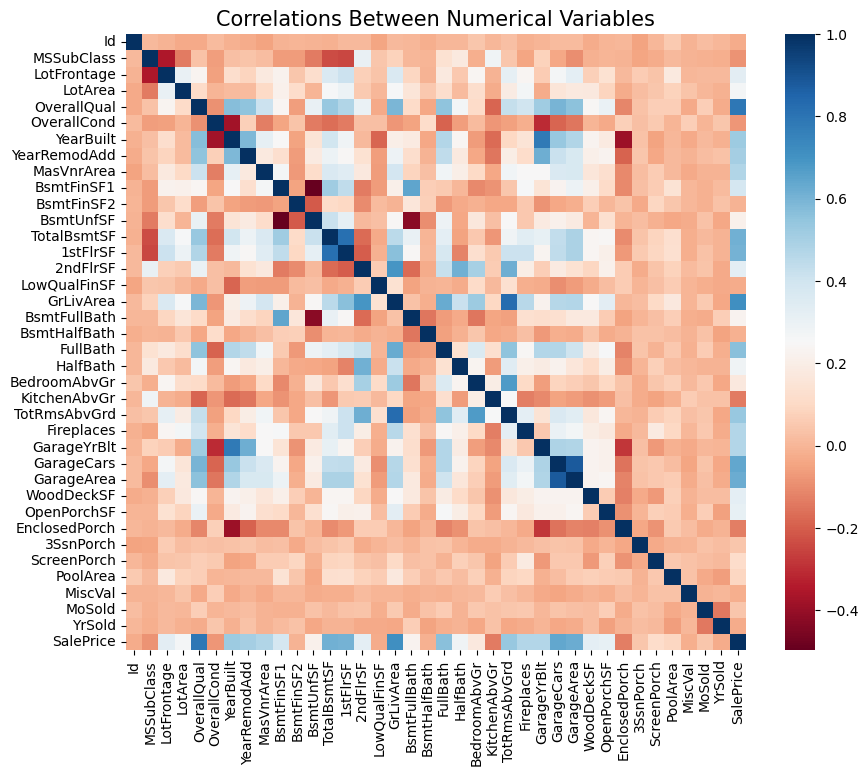

In [277]:
plt.figure(figsize=(10,8))
plt.title("Correlations Between Numerical Variables", size=15)
plt.rc('axes', labelsize=50)
sns.heatmap(train_exp1.corr(), cmap='RdBu')

## Feature Selection

### Selecting numerical features that have Medium to High correlation (+- .30)

In [278]:
num_features = list(train_exp1.corr()["SalePrice"][(train_exp1.corr()["SalePrice"]>0.50) | (train_exp1.corr()["SalePrice"]<-0.50)].index)
num_features.remove('SalePrice')
num_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea']

## Modeling

In [284]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled[num_features], y, test_size = 0.3, random_state = 1)

In [285]:
#get a look at our shape
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1015, 10), (1015,), (436, 10), (436,))

In [286]:
from sklearn import linear_model

# initialize linear regression model
lr = linear_model.LinearRegression()

# fit the model with our X and y
lr_model = lr.fit(X_train, y_train)

In [287]:
#Model summary
X2 = sma.add_constant(X_train)

#create OLS model and fit it
est = sma.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

ValueError: The indices for endog and exog are not aligned

# Experiment 2

## This time I do not want to remove any null values and will create dummy variables for the categoricals

In [293]:
exp2 = train

In [294]:
exp2.select_dtypes(exclude='object').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [296]:
#Fill in numerical columns
for column in [exp2.select_dtypes(exclude='object').columns]:
    exp2.loc[:,(column)] = exp2.loc[:,(column)].fillna(exp2[column].mean())

In [304]:
exp2.select_dtypes(exclude='object').isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [302]:
#Fill in categorical columns
for column in[
    'MasVnrType',
    'Electrical'
]:
        exp2.loc[:,column] = exp2.loc[:,column].fillna(exp2[column].mode()[0])
    
for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]:
    exp2.loc[:,(column)] = exp2.loc[:,(column)].fillna("None")

In [303]:
exp2.select_dtypes('object').isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [305]:
exp2 = pd.get_dummies(train, columns=train.select_dtypes(['object']).columns,drop_first=True)

In [306]:
exp2.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


## Scaling and modeling

In [308]:
X2 = exp2.drop(columns='SalePrice')
y2 = exp2['SalePrice']

In [309]:
scaled = StandardScaler().fit_transform(X2)

#put into a df
X2_scaled = pd.DataFrame(scaled,columns = X2.columns)

X2_scaled

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730865,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-1.728492,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-1.726120,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-1.723747,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,-1.721374,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1456,1.723747,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1457,1.726120,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1458,1.728492,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [310]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size = 0.3, random_state = 7)

In [311]:
X2_train.shape,y2_train.shape,X2_test.shape,y2_test.shape


((1022, 260), (1022,), (438, 260), (438,))

In [312]:
lr2 = linear_model.LinearRegression()

In [313]:
lr_m2 = lr2.fit(X2_train, y2_train)

In [314]:
#Model Summary
X_2c = sma.add_constant(X2_train)

#Create OLS model and fit it
est_exp2 = sma.OLS(y2_train, X_2c)
est2_exp2 = est_exp2.fit()
print(est2_exp2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     58.87
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:16:08   Log-Likelihood:                -11441.
No. Observations:                1022   AIC:                         2.336e+04
Df Residuals:                     782   BIC:                         2.455e+04
Df Model:                         239                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Id                      739.56

In [315]:
#Get our coefficient of determination
print('Coefficient of Determination:',lr_m2.score(X2_test, y2_test))

Coefficient of Determination: -7.970027345340802e+20


In [316]:
#creates table to show the features and their coefficients 
coeff_df = pd.DataFrame(lr_m2.coef_, X2_test.columns, columns=['Coefficients'])
coeff_df

,Coefficients
Id,738.568471
MSSubClass,-4053.514732
LotFrontage,1433.237841
LotArea,9228.499906
OverallQual,8783.215718
...,...
SaleCondition_AdjLand,1393.093750
SaleCondition_Alloca,-202.390625
SaleCondition_Family,-151.390625
SaleCondition_Normal,1878.296875


## Testing the model

In [317]:
y_pred2 = lr_m2.predict(X2_test)

In [318]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y2_test, y_pred2)
mse = metrics.mean_squared_error(y2_test, y_pred2)
rmse = metrics.mean_squared_error(y2_test, y_pred2,squared = False)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)

Mean Absolute Error: 268002785325734.0
Mean Square Error: 5.795911968293799e+30
Root Mean Square Error: 2407470034765500.5


## Experiment 3

## There was very high multicollinarity and absolutely insane errors. So I'm going to first identify all the feautures correlated with eachother and try again

In [330]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X2_scaled.columns

#calculating Variance inflation for each feature
vif_data["VIF"] = [variance_inflation_factor(X2_scaled.values, i)
for i in range(len(X2_scaled.columns))]

print(vif_data)

c:\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                   feature        VIF
0                       Id   1.215466
1               MSSubClass  35.000079
2              LotFrontage   2.683203
3                  LotArea   3.416198
4              OverallQual   5.614194
..                     ...        ...
255  SaleCondition_AdjLand   1.665934
256   SaleCondition_Alloca   1.834039
257   SaleCondition_Family   1.432186
258   SaleCondition_Normal   3.551724
259  SaleCondition_Partial  49.303968

[260 rows x 2 columns]


In [329]:

vif_data[vif_data['VIF']<5]

,feature,VIF
0,Id,4.866844
8,MasVnrArea,4.138201
18,BsmtHalfBath,1.577953
20,HalfBath,4.998668
28,WoodDeckSF,2.423229
...,...,...
251,SaleType_ConLw,1.444103
253,SaleType_Oth,1.232474
255,SaleCondition_AdjLand,1.669593
256,SaleCondition_Alloca,1.844975


In [338]:
X3 = exp2[vif_data['feature'].unique()].drop(['Id','MSSubClass'], axis=1)
y3 = exp2['SalePrice']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3, random_state = 7)

lr3 = linear_model.LinearRegression()
lr_m3 = lr3.fit(X3_train, y3_train)

#Model Summary
X_3c = sma.add_constant(X3_train)

#Create OLS model and fit it
est_exp3 = sma.OLS(y3_train, X_3c)
est3_exp3 = est_exp3.fit()
print(est3_exp3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     59.35
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:39:28   Log-Likelihood:                -11443.
No. Observations:                1022   AIC:                         2.336e+04
Df Residuals:                     784   BIC:                         2.453e+04
Df Model:                         237                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.071e+

In [339]:
y_pred3 = lr_m3.predict(X3_test)

mae = metrics.mean_absolute_error(y3_test, y_pred3)
mse = metrics.mean_squared_error(y3_test, y_pred3)
rmse = metrics.mean_squared_error(y3_test, y_pred3,squared = False)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)

Mean Absolute Error: 21948.805926290966
Mean Square Error: 1836027332.8839428
Root Mean Square Error: 42848.88951751192


## Well, the price predictions are now off by approximately $21,948. That's not very good, but it's MUCH better than the first iteration. Let's keep trying...